# Маркетинговый анализ развлекательного приложения Procrastinate Pro+.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Нужно разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

•	лог сервера с данными об их посещениях;

•	выгрузка их покупок за этот период;

•	рекламные расходы.

Необходимо изучить:

•	откуда приходят пользователи и какими устройствами они пользуются;

•	сколько стоит привлечение пользователей из различных рекламных каналов;

•	сколько денег приносит каждый клиент;

•	когда расходы на привлечение клиента окупаются;

•	какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

display('Таблица visits ======================================================================================================')
display(visits.head())
display(visits.info())
display('Дубликаты в visits', visits.duplicated().sum())

display('Таблица orders ======================================================================================================')
display(orders.head())
display(orders.info())
display('Дубликаты в orders', orders.duplicated().sum())

display('Таблица costs =======================================================================================================')
display(costs.head())
display(costs.info())
display('Дубликаты в costs', costs.duplicated().sum())

'Таблица visits ======================================================================================================'

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

'Дубликаты в visits'

0

'Таблица orders ======================================================================================================'

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

'Дубликаты в orders'

0

'Таблица costs ======================================================================================================='

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

'Дубликаты в costs'

0

Пропусков в данных нет, дубликатов тоже. Столбцы "Session Start" и "Session End" таблицы visits, "Event Dt" таблицы orders, "dt" таблицы costs переведем в datetime. Заодно приведём названия столбцов к корректному виду.

In [2]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Проверим качество исходных данных. Начну с числовых столбцов.

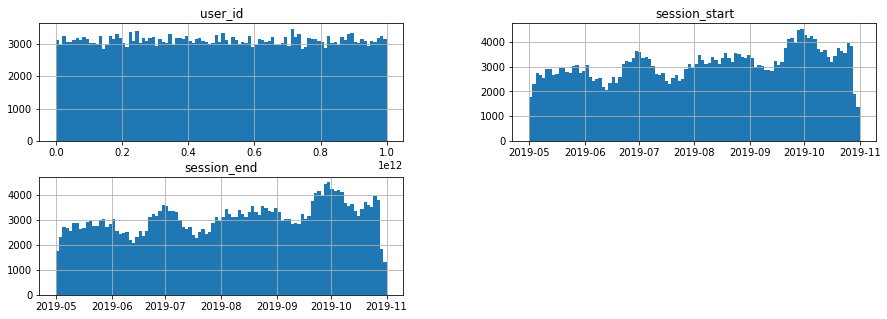

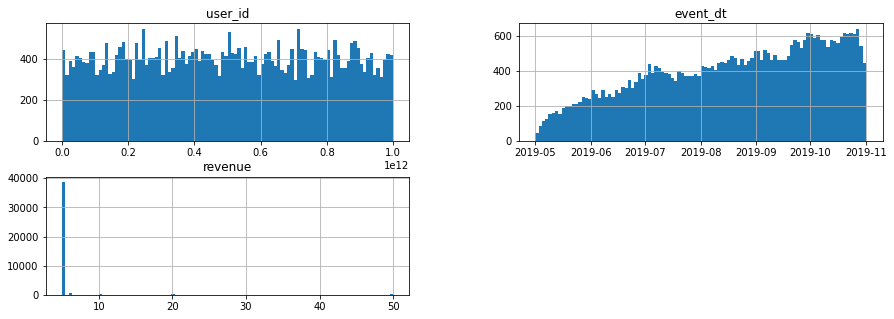

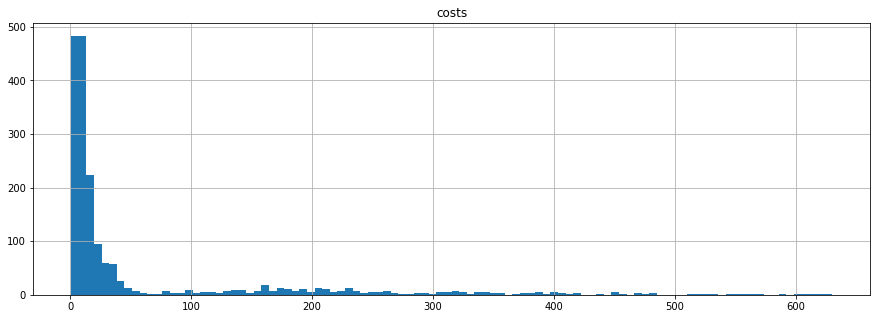

In [3]:
visits.hist(bins=100, figsize=(15, 5))
orders.hist(bins=100, figsize=(15, 5))
costs.hist(bins=100, figsize=(15, 5))
plt.show()

В основном данные выглядят корректно. Хочу выделить столбец costs из таблицы costs. В нем распределние сумм расходов на рекламу можно посчитать выбросом. Но по логике данного столбца значения трат на рекламу могут быть любыми. Учитывая, что распределение значений в нем мягко приближается к нулю и остальные столбцы в этой талице выглядят корректно, исключение данных из него может негативно сказаться на анализе.

Похожая ситуация со столбцом revenue из таблицы orders, но здесь выделятся несколько значений, гистограмма не приближается к нулю. Посмотрим, какие значения есть в столбце и сколько их.

In [4]:
orders.groupby('revenue').agg({'user_id': 'count'})

,user_id
revenue,
4.99,38631
5.99,780
9.99,385
19.99,204
49.99,212


Значения в данном столбце похожи на суммы реальных покупок, исключать выбивающиеся значения считаю нецелесообразным.

По нечисловым столбцам посмотрю уникальные значения.

In [5]:
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())
display(costs['channel'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Скрытых дубликатов нет. Списки рекламных каналов в таблицах visits и costs соответствует друг другу.

Вывод: данные корректны и подходят для анализа.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [6]:
# функция для получения пользовательских профилей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

# функция для расчёта удержания
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# функция для расчёта конверсии
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# функция для расчёта LTV и ROI
def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

# функция для сглаживания датафрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей, минимальная и максимальная даты привлечения

In [7]:
events = None
profiles = get_profiles(visits, orders, events, costs)
display(profiles.head())
display(profiles.info())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


None

In [8]:
print('Минимальная дата привлечения', profiles['dt'].sort_values().min().isoformat())
print('Максимальная дата привлечения', profiles['dt'].sort_values().max().isoformat())

Минимальная дата привлечения 2019-05-01
Максимальная дата привлечения 2019-10-27


Таблица сформирована корректно, пропусков нет, форматы данных правильные.

Собрана информация о пользователях с 01 мая по 27 октября 2019 года, почти полные 6 месяцев.

#### Информация по странам пользователей

In [9]:
region_stat = profiles.groupby('region').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='user_id', ascending=False)
region_stat['payer'] = round(region_stat['payer'] * 100, 2)
region_stat

,user_id,payer
region,,
United States,100002,6.90
UK,17575,3.98
France,17450,3.80
Germany,14981,4.11


Больше всего пользователей пришло из США, их количество в два раза перекрывает пользователей из остальных стран вместе взятых. Пользователей из Великобритании и Франции почти поровну. Немногим меньше пользователей из Германии.

Процент платящих пользователей самый высокий в США - 6,9 процентов. На втором месте Германия, платящих пользователй в ней 4,11 процентов, что заметно меньше, чем в США. На третьем и четвертом месте Велиеобритания и Франция, их процент платящих пользователей немного меньше , чем в Германии.

#### Информация по устройствам пользователей

In [10]:
device_stat = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='user_id', ascending=False)
device_stat['payer'] = round(device_stat['payer'] * 100, 2)
device_stat

,user_id,payer
device,,
iPhone,54479,6.21
Android,35032,5.85
PC,30455,5.05
Mac,30042,6.36


Больше всего пользователей пришли с iPhone устройств. На втором месте устройства Android, но с сильным отставанием по количествук пользователей. Третье и четвертое место с похожими показателями PC и MAC.

Лучший процент платящих пользователей на платформе Mac - 6,36 процентов. Немного меньше у iPhone - 6,21 процента. Третье место за Android с 5,85 процентами. Меньше всего у PC - 5,05. Но в этом показателе огромных различий между платформами нет.

#### Информация по рекламным источникам

In [11]:
channel_stat = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='user_id', ascending=False)
channel_stat['payer'] = round(channel_stat['payer'] * 100, 2)
channel_stat

,user_id,payer
channel,,
organic,56439,2.06
FaceBoom,29144,12.20
TipTop,19561,9.60
OppleCreativeMedia,8605,2.71
LeapBob,8553,3.06
WahooNetBanner,8553,5.30
RocketSuperAds,4448,7.91
MediaTornado,4364,3.57
YRabbit,4312,3.83


Больше всего пользователей (56439) пришло "естественным" путем. На втором месте, с почти в два раза меньшим количеством пользователей источник FaceBoom. На третьем месте TipTop c 19561 пользователем. Группа из трех источников OppleCreativeMedia, LeapBob и WahooNetBanner принесли около 8500 пользователей каждый, что заметно меньше, чем лидеры, но все равно значимый показатель.

Самый большой процент платящих пользователей у источника FaceBoom - 12,2 процента. На втором и третьем месте AdNonSense и lambdaMediaAds, но у них меньше всего общее количество привлеченных пользователей. Важно отметить, что на четвертом месте по этому показателю источник TipTop - 9,6 процента, учитывая, что он находится на 3 месте по привлеченным пользователям, такой результат значим. Остальные источники показывают заметно меньшие результаты по проценту платящих пользователей. Хуже всех, ожидаемо, пользователи, пришедшие "естественным" путем, всего 2,06 процента.

В целом, типичный пользователь приложения - житель США, пользующийся iPhone-ом, который сам нашел приложение и, к сожалению, не сделал в нем покупок.

Больше всего пользователей приходит из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг и распределение по рекламным источникам

In [12]:
print('Общая сумма расходов на маркетинг', round(costs['costs'].sum()))
display(costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False))

Общая сумма расходов на маркетинг 105497


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Из общей суммы расходов на рекламу в размере 105497, половина израсходована на источник TipTop, еще треть на FaceBoom. Остальные источники делят между собой оставшиеся ~15 процентов от общих расходов. С учетом довольно неплохих показателей по привлечению платящих пользователей у этих источников, на данный момент распределение кажется вполне логичным.

#### Изменение расходов на рекламу во времени

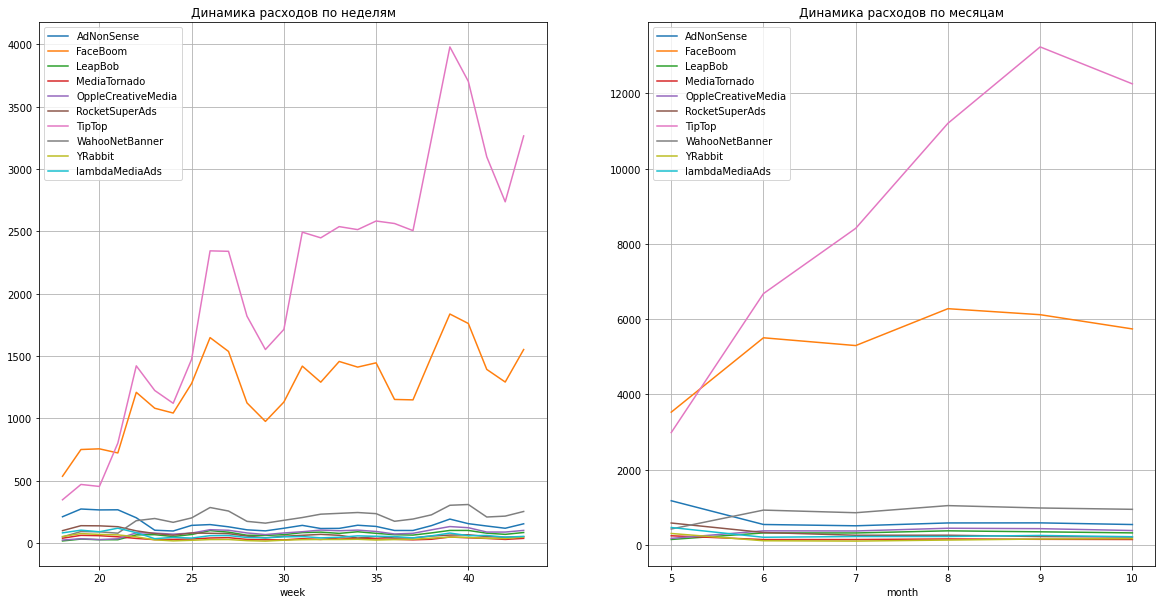

In [13]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum').T.plot(grid=True, ax=ax1)
plt.legend()
plt.title('Динамика расходов по неделям')

ax2 = plt.subplot(1, 2, 2)
costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum').T.plot(grid=True, ax=ax2)
plt.legend()
plt.title('Динамика расходов по месяцам')

plt.show()

На обоих графиках сильно выделяются лидеры по общим расходам на рекламу - TipTop и FaceBoom. Недельные расходы на TipTop имеют тенденцию к увеличению, что подтверждается помесячным графиком. Расходы на FaceBoom в первые недели заметно повышаются, потом выравниваются. Расходы на рекламу в остальных источниках заметно ниже двух озвученных, расходы на них стабильные, без резких повышений и спадов. Месячные расходы во всех источниках немного снижены в последнем месяце, это корее всего связано с тем, что информация по нему неполная.

#### CAC по источникам

In [14]:
user_cac = profiles.groupby('channel').agg({'user_id': 'count', 'acquisition_cost': 'sum'})
user_cac['cac'] = round((user_cac['acquisition_cost'] / user_cac['user_id']), 2)
user_cac['cac'].sort_values(ascending=False)

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.22
LeapBob               0.21
organic               0.00
Name: cac, dtype: float64

Очень сильно выделяется стоимость привлечения для источника TipTop, она два с половиной раза выше, чем у второго по этому показателю FaceBoom. Похожее на него значение у источника AdNonSense. Источники OppleCreativeMedia, MediaTornado, YRabbit, LeapBob самые дешевые, их стоимость привлечения очень похожая.

Могу отметить странную ситуацию, самый дорогой по стоимости рекламы и объемам затрат канал привлечения не является самым продуктивным в части привлечения пользователей. FaceBoom выглядит перспективно, он приносит много пользователей, но является вторым по CAC. Насколько это оправдано, рассмотрим далее.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Окупаемость рекламы

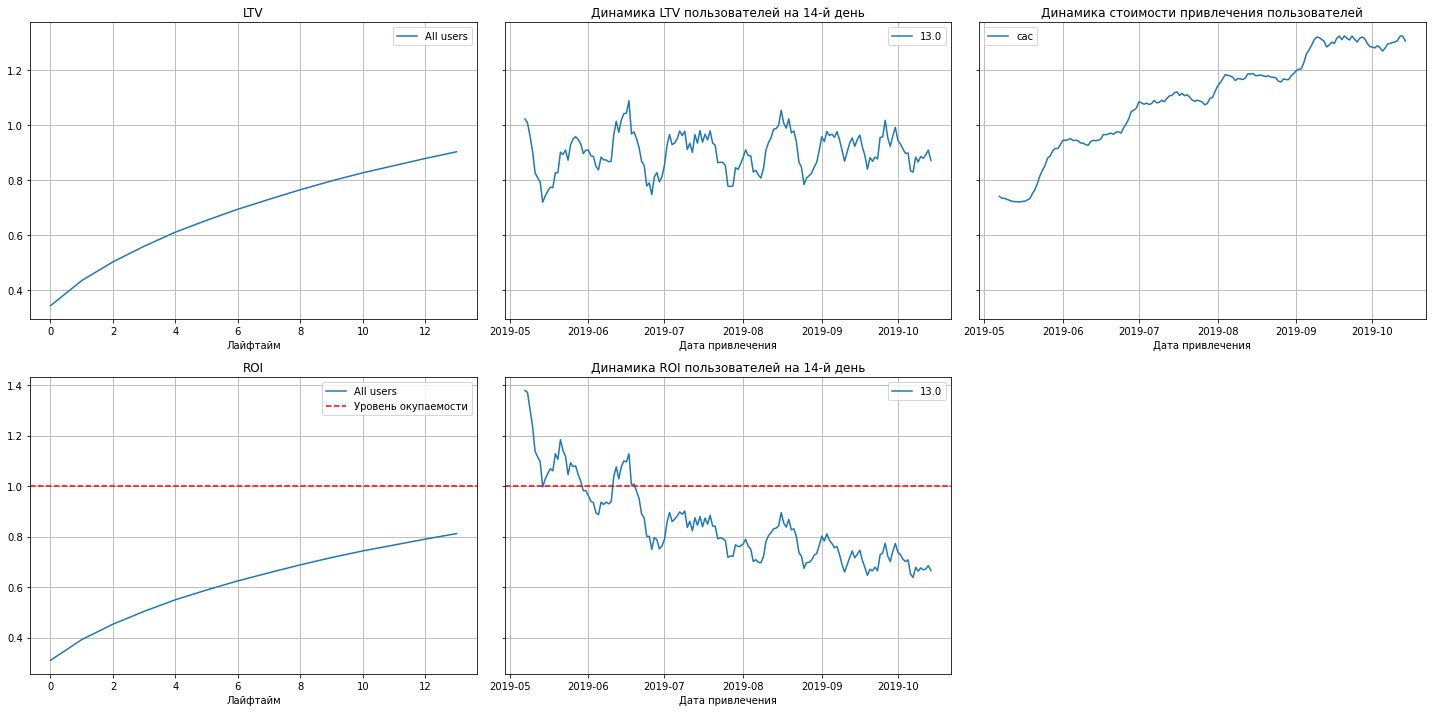

In [15]:
profiles_wo_organic = profiles.query('channel != "organic"')
observation_date = datetime(2019, 10, 27).date()
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_organic, orders, observation_date, 14)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Главное, что видно из графиков - пользователи не окупаются. В среднем ROI за весь период достигает немногим больше 80%. При этом видно, что ROI на 14 день пользователей, привлечённых в мае - середине июня чаще был положительным, в остальные периоды он провалился, в середине октября он составил 60%. При этом, если посмотреть на динамику LTV на 14 день, заметно, что она сильно различается для пользователей, привлеченных в разные даты, но общей тенденции к увеличению или уменьшению нет, в то время как стоимость привлечения стабильно увеличивается, что и даёт такой провал в показателе ROI.

#### Конверсия и удержание

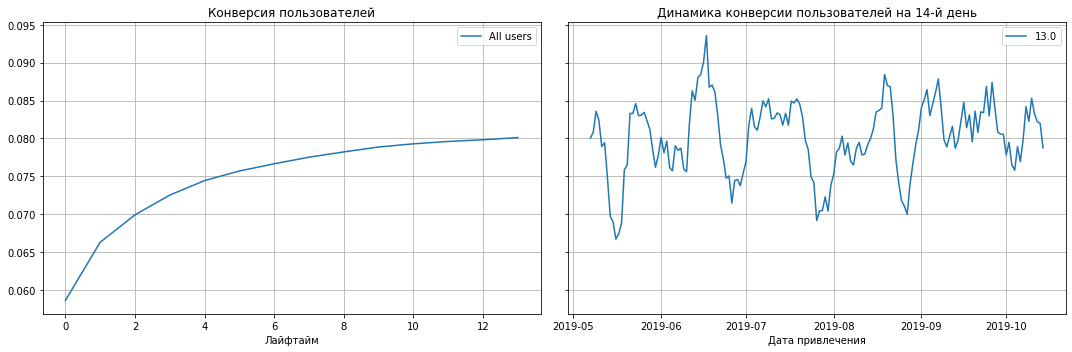

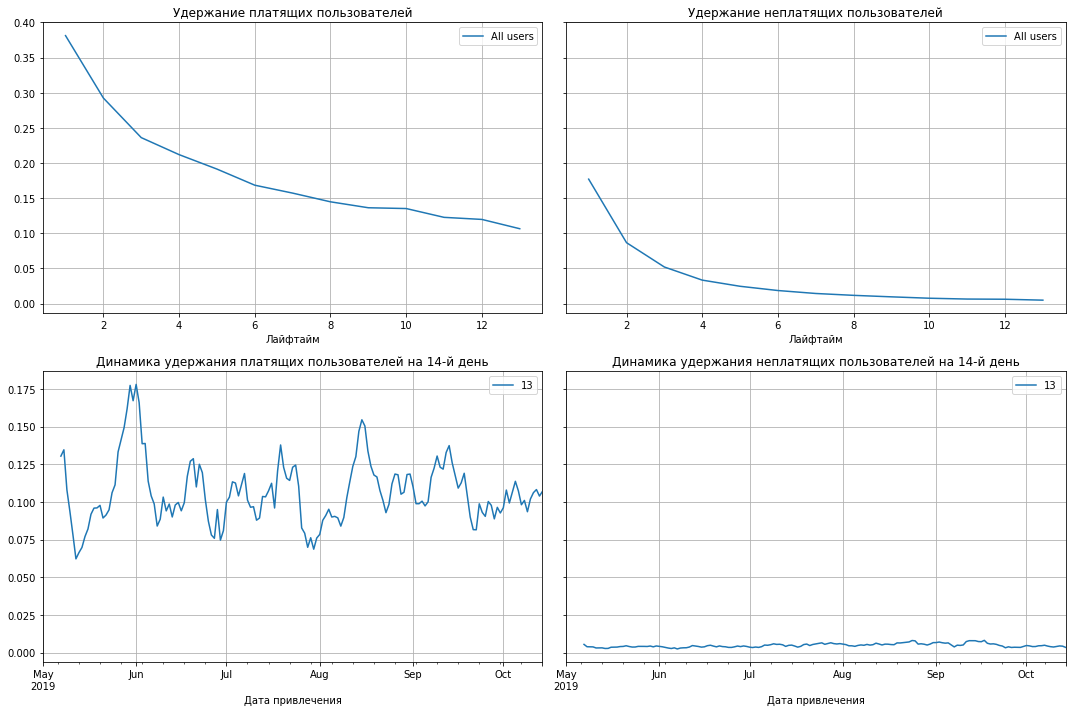

In [16]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_wo_organic, orders, observation_date, 14)
retention_raw, retention, retention_history = get_retention(profiles_wo_organic, visits, observation_date, 14)
plot_conversion(conversion, conversion_history, 14)
plot_retention(retention, retention_history, 14)

В среднем конверсия пользователей за весь период на 14 день достигает 8%. Но она сильно зависит от периода, в который был привлечен пользователь, лучший показатель у привлеченных в середине июня - почти 10%. Сильной тенденции к увеличению или уменьшению график не показывает. Можно сказать, что в конце периода этот показатель более стабилен, разброс между минимальными и максимальными пиками меньше, чем в начале периода. В целом, график динамики конверсии коррелирует с графиком динамики LTV - в периоды более высокой конверсии вырастает LTV и наоборот.

Удержание платящих пользователей на 14 день в среднем за период составило около 11. График динамики показывает зависимость от периода привлечения, также как графики LTV и конверсии, и также не имеет выраженной тенденции к увеличению или уменьшению.

Удержание неплатящих пользователей на 14 день стремится к нулю. На всем протяжении периода не превышает 1 %. Продукт таким пользователям не интересен.

#### Окупаемость рекламы с разбивкой по устройствам

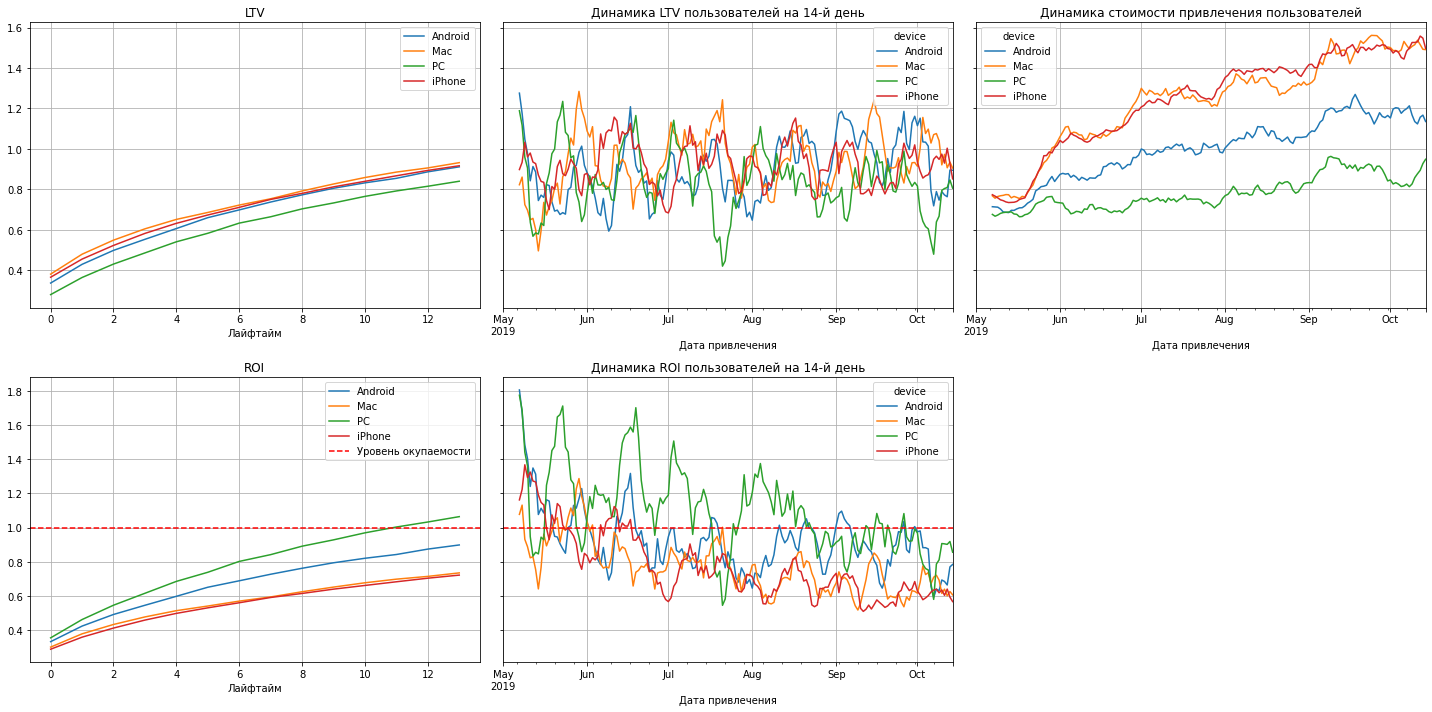

In [17]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_organic, orders, observation_date, 14, dimensions=['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

LTV по всем устройствам очень похож, немного выделяется в худшую сторону платформа PC. LTV на 14 день для всех платформ сильно колеблется, у всех есть хорошие и плохие периоды привлечения.

При низком LTV, платформа PC показывает лучший показатель ROI - это единственная платформа, вышедшая в среднем на окупаемость, пусть и небольшую. Причина такого - стоимость привлечения пользователей у этой платформы самая низкая, она увеличивается к концу периода, но не так сильно как стоимость привлечения на платформах iPhone и Mac. Из-за огромной стоимости привлечения эти платформы показывают худшую окупаемость. График динамики подтверждает что платформа PC в целом стабильно окупалась, но ближе к концу периода ни одна из платформ практически не выходит за границы окупаемости. Это происходит из-за того, что LTV кардинально не меняется, а стоимость привлечения пользователей постоянно растёт.

#### Окупаемость рекламы с разбивкой по странам

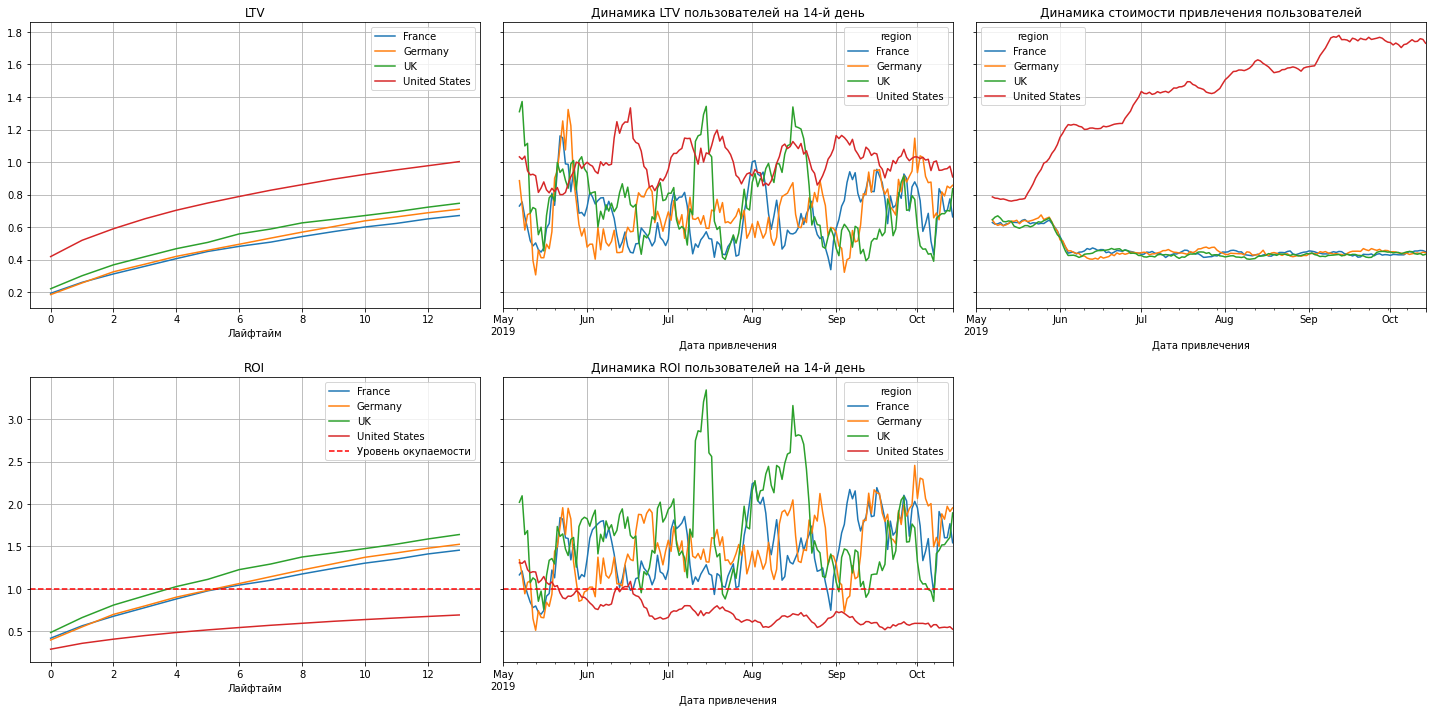

In [18]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_organic, orders, observation_date, 14, dimensions=['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Пользователи из США показывают самый высокий и самый стабильный LTV среди всех остальных стран. Но они также стабильно не окупаются. Это единственная страна, не вышедшая в среднем за порог окупаемости. Динамика ROI это подтверждает. График США выходит за порог окупаемости только в начале периода, в то время как остальные страны в начале проседают, но в остальном периоде практически не выходят за границу вниз, а в Великобритании в определенные моменты окупаемость пользователей превышает 300%.

Это связано со стоимостью привлечения пользователей. Все страны начинаю с похожих значений, но стоимость привлечения в США резко идёт вверх, к концу периода превышая начальное значение более чем в два раза, в то время как стоимость привлечения в остальных странах наоборот почти сразу уменьшается и остается стабильной до конца периода. Учитывая количество пользователей из США, которые составляю большинство пользователей продукта, эти показатели оказывают огромное влияние на общие показатели окупаемости.

#### Окупаемость рекламы с разбивкой по рекламным каналам

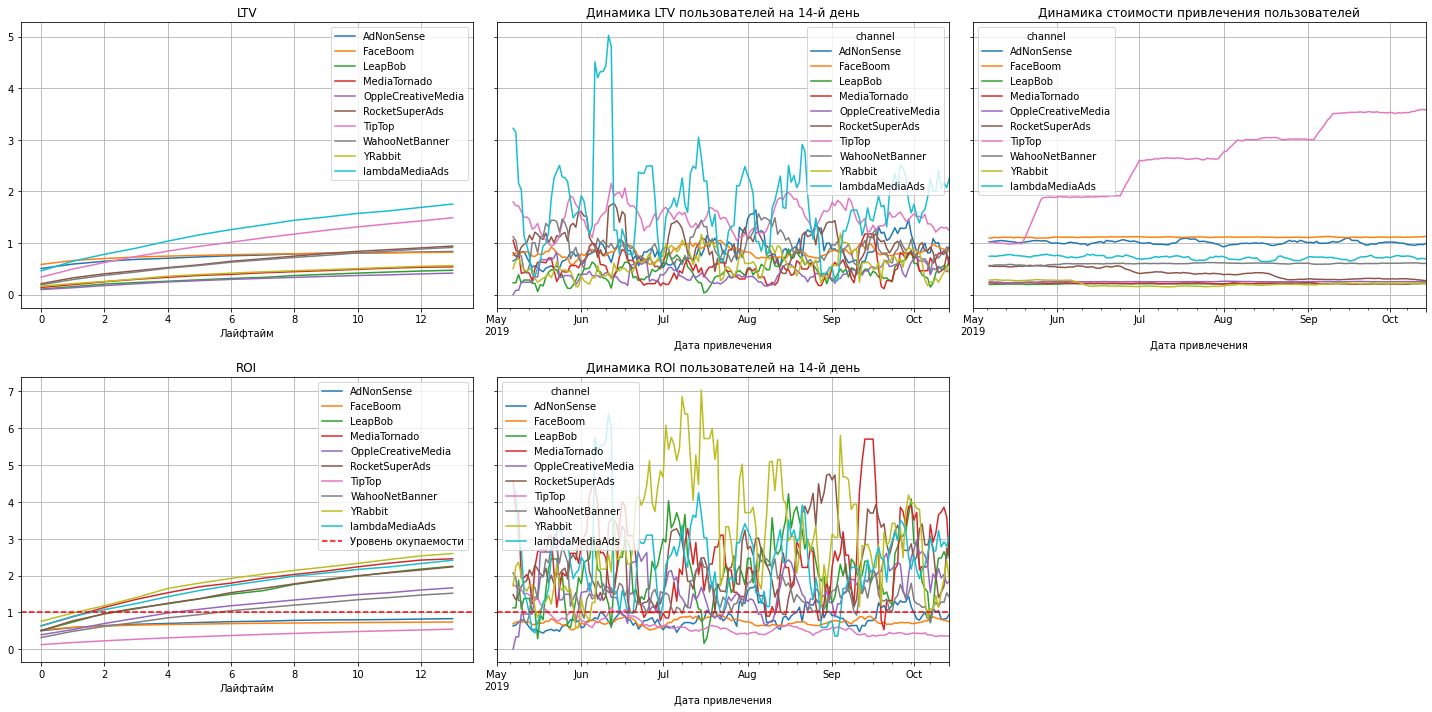

In [19]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_organic, orders, observation_date, 14, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Лучше остальных по показателю LTV себя показывают каналы lambdaMediaAds и TipTop, в динамике они также показывают себя лучше, их графики стабильно выше остальных. Два источника показывают посредственный рост LTV на протяжении лайфтайма - FaceBoom и AdNonSense, их графики самые пологие.

В среднем, отличную окупаемость (более 200%) показывают каналы YRabbit, MediaTornado, lambdaMediaAds, LeapBob и RocketSuperAds. Более интересны каналы со средней окупаемостью меньше 100% - TipTop, FaceBoom и AdNonSense. По динамике показателя видно, что эти каналы стабильно не окупаются. Привлечение пользователей через канал TipTop в начале периода окупалось, то после продолжительного повышения стоимость привлечения, на окупаемость не смог бы выйти ни один канал из представленных. Хуже ситуация с FaceBoom. Пользователи, пришедшие через этот канал не окупались никогда. Если мы исключим TipTop, у этого канала самая высокая стоимость привлечения, которую не покрывает не самый хороший LVT. Учитывая, что эти два канала являются лидерами и по количеству привлеченных пользователей, по расходам на рекламу, также у них высокие показатели по конверсии пользователей, ситуация выглядит катастрофичной.

#### Промежуточный вывод

В целом, реклама по привлечению пользователей не окупается, средний ROI очень низкий - около 80%.

Самым затратным пользователем можно считать жителя США с iPhone-ом или компьютером Mac, кликнувшим по баннеру в TipTop или FaceBoom. Складывается впечатление, что в продвижении продукта был выставлен приоритет выйти на рынки определённых стран или на определенных устройствах любой ценой, поскольку самые неэффективные в части затрат на рекламу страны, платформы и каналы привлечения являются и самыми массовыми.

Думаю, сильно влияние на окупаемость продукта в первую очередь оказывают пользователи из США - среди привлечённых через рекламные каналы пользователей их большинство, в два раза больше, чем пользователей из других стран вместе взятых. Поэтому стоит пересмотреть портфель рекламных затрат в этой стране и снизить среднюю стоимость привлечения, потенциально этот регион может показать хороший ROI, учитывая самый высокий LTV среди всех стран.

In [20]:
region_stat = profiles_wo_organic.groupby('region').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)
region_stat

,user_id
region,
United States,61829
UK,11154
France,11058
Germany,9528


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

На мой взгляд основные причины неэффективности привлечения следующие:

- увеличение стоимости привлечения пользователей (в частности в США);

- отсутствие тенденции к увеличению LTV;

- отсутствие тенденции к увеличению конверсии пользователей;

- отсутствие тенденции к увеличению удержания пользователей.

Получается ситуация, когда основные показатели деятельности по привлечению и стимулированию пользователей на покупки не показывают прогресса, а расходы на них только увеличиваются. Как результат - окупаемость ниже 100%.

Основная рекомендация - в первую очередь пересмотреть портфель рекламных затрат в США и найти способы снизить стоимость рекламы в этом регионе. После этого необходимо провести повторный анализ.

Также необходимо искать возможности по улучшению показателей LTV, принимать меры по увеличению удержания платящих пользователей.

Стоит обратить внимание на удержание не платящих пользователей. Продукт им не интересен, изменения для них могут хорошо повлиять на конверсию.

Стоит изолированно посмотреть, какие каналы хорошо себя показывают в США.

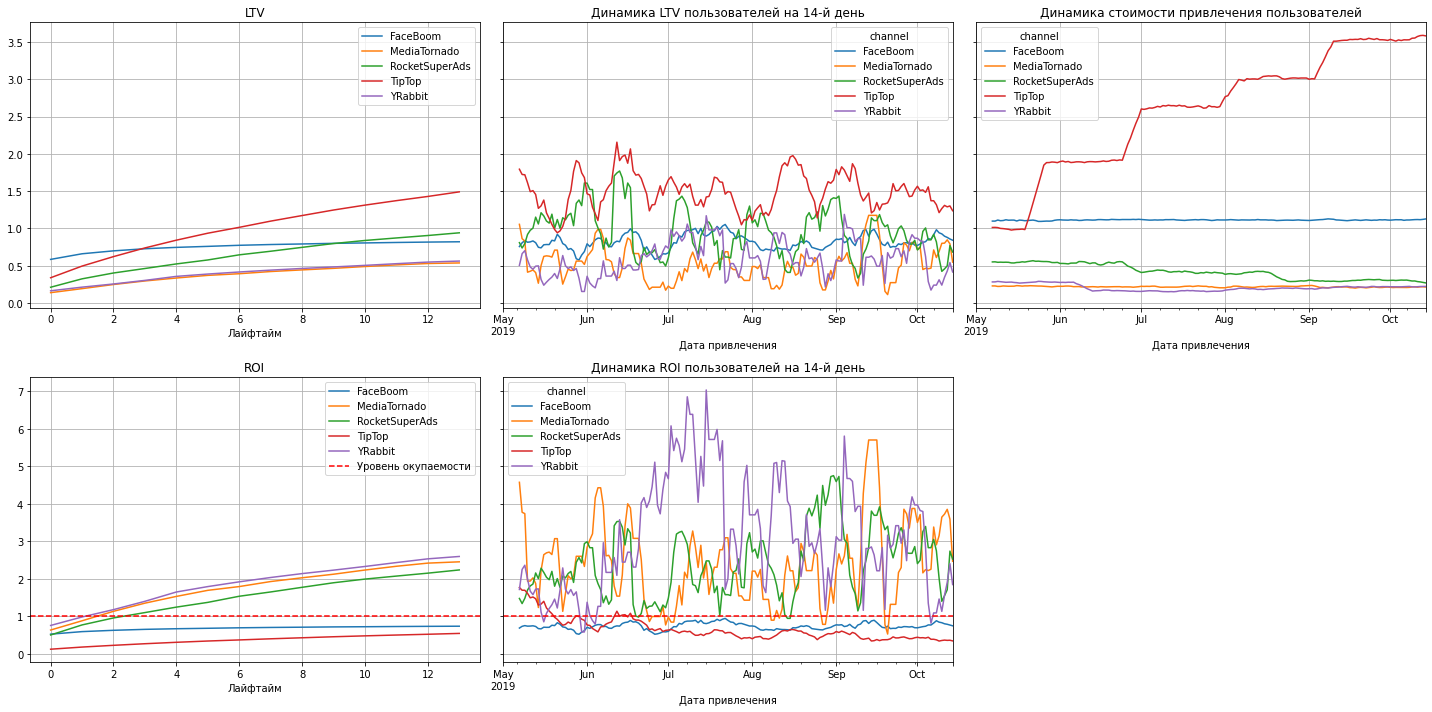

,user_id,payer
channel,,
FaceBoom,29144,12.20
TipTop,19561,9.60
RocketSuperAds,4448,7.91
MediaTornado,4364,3.57
YRabbit,4312,3.83


In [21]:
profiles_wo_organic_usa = profiles_wo_organic.query('region == "United States"')
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_organic_usa, orders, observation_date, 14, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)
usa_stat = profiles_wo_organic_usa.groupby('channel').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='user_id', ascending=False)
usa_stat['payer'] = round(usa_stat['payer'] * 100, 2)
usa_stat

Если не брать во внимание убыточные каналы, лучшим из трёх оставшихся вариантов выглядит RocketSuperAds, у него самый высокий показатель средней конверсии. В остальном каналы похожи. Они приносят похожее количество пользователей и ROI у всех стабильно выше 100%.